# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Задача:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

<div class="alert alert-info">
 <font color='Blue'>
     <b>Импорт библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, KFold
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, mean_absolute_error, make_scorer, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from scipy import stats as st

<div class="alert alert-info">
 <font color='Blue'>
     <b>Подключаем датафреймы

In [2]:
df_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [3]:
df=pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<div class="alert alert-info">
 <font color='Blue'>
     <b>Переводим дату в нужный формат(во всех трех датасетах)

In [5]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')

In [6]:
df.set_index('date', inplace=True)


In [7]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_train.set_index('date', inplace=True)


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_test.set_index('date', inplace=True)

Вывод

<div class="alert alert-info">
 <font color='Blue'>
     <b>
В тестовой выборке не все столбцы. Позднее, мы посмотрим, почему

<div class="alert alert-info">
 <font color='Blue'>
     <b>
Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

<div class="alert alert-info">
 <font color='Blue'>
     <b>Рассчитаем по формуле, которую дали в инструкции

In [10]:

df_train['rougher.output.recovery_test'] = (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100


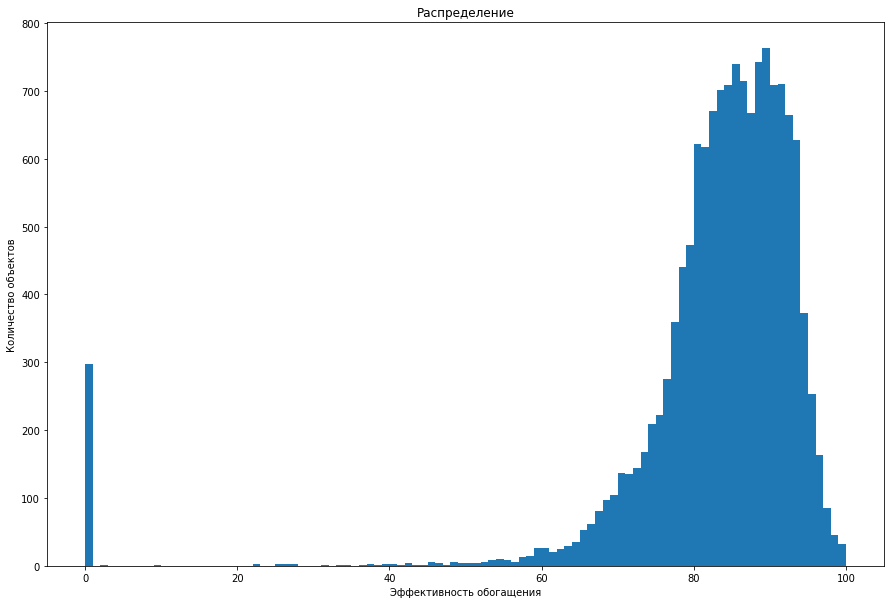

In [11]:
df_train['rougher.output.recovery'].hist(bins=100, figsize=(15, 10))
plt.xlabel('Эффективность обогащения')
plt.ylabel('Количество объектов')
plt.grid(linewidth=0.5)
plt.title('Распределение')
plt.show()

In [12]:
df_train['rougher.output.recovery_test'].head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery_test, dtype: float64

In [13]:
df_train['rougher.output.recovery_test'].value_counts().head()

-0.000000      297
 83.406924      10
 100.000000      5
 91.792293       5
 91.636690       4
Name: rougher.output.recovery_test, dtype: int64

In [14]:
print(mean_absolute_error(df_train['rougher.output.recovery_test'], y_pred=df_train['rougher.output.recovery']))


9.73512347450521e-15


<div class="alert alert-info">
 <font color='Blue'>
     <b>Ошибка близка к нулю, а значит, эффективность обогащения посчитана верно.

<div class="alert alert-info">
 <font color='Blue'>
     <b>Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [15]:
df_test.columns


Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [16]:
list(df_test.columns)

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

In [17]:
for i in list(df.columns):
    if i not in df_test.columns:
        print(i)
    

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

<div class="alert alert-info">
 <font color='Blue'>
     <b>В тестовой выборке отсутствуют все признаки относящиеся к параметрам продуктов всех этапов обработки, а также расчетные характеристики для флотации.

<div class="alert alert-info">
 <font color='Blue'>
     <b>
Исправим отрицательные значений в признаках уровня жидкости в установках


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

In [19]:
levels=list(df.filter(regex='level').columns)
levels

['primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_level',
 'secondary_cleaner.state.floatbank6_a_level']

In [25]:
df['liquid_level_values_lower_than_0'].head()

date
2016-01-15 00:00:00    19
2016-01-15 01:00:00    19
2016-01-15 02:00:00    19
2016-01-15 03:00:00    19
2016-01-15 04:00:00    19
Name: liquid_level_values_lower_than_0, dtype: int64

In [20]:
df['liquid_level_values_lower_than_0'] = df[levels].apply(lambda x: (x < 0).sum(), axis=1)


In [24]:
df['liquid_level_values_lower_than_0'].head()

date
2016-01-15 00:00:00    19
2016-01-15 01:00:00    19
2016-01-15 02:00:00    19
2016-01-15 03:00:00    19
2016-01-15 04:00:00    19
Name: liquid_level_values_lower_than_0, dtype: int64

In [21]:
df.loc[:, levels] = df.loc[:, levels] * -1


In [22]:
# Удалим признаки в обучающей выборке, которых нет в тестовой выборке
df_train = df_train[df_test.columns]


In [23]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [24]:
print('В обучающей выборке : {} строк {} признаков'.format(df_train.shape[0],df_train.shape[1]))
print('В тестовой выборке: {} строк {} признаков'.format(df_test.shape[0], df_test.shape[1]))

В обучающей выборке : 12679 строк 52 признаков
В тестовой выборке: 5229 строк 52 признаков


## Анализ данных

<div class="alert alert-info">
 <font color='Blue'>
     <b>
Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Сделаем это для наглядности боксплотами на одном графике

<AxesSubplot:>

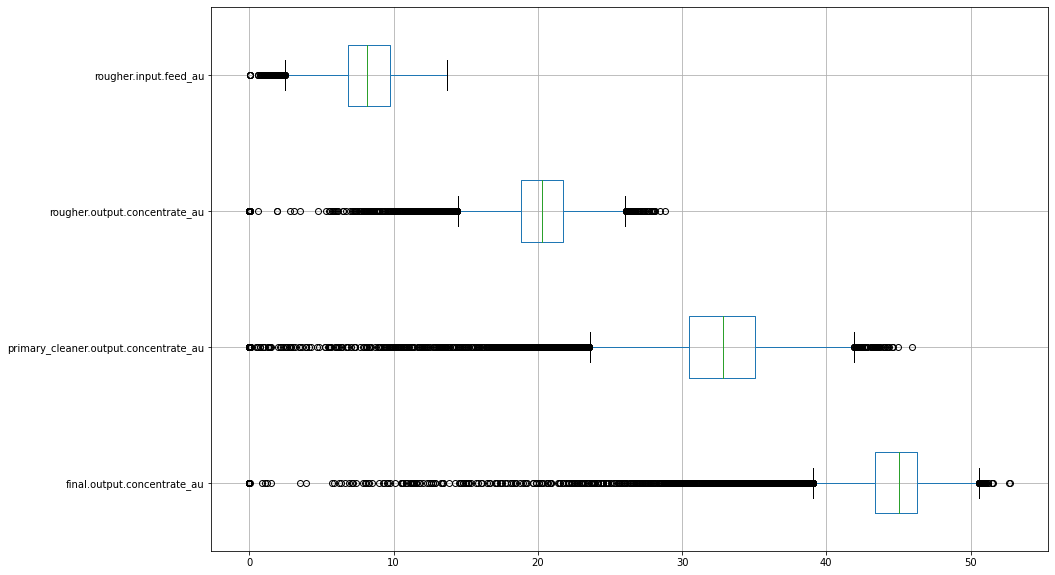

In [25]:
df.boxplot(
        column=[f'final.output.concentrate_au', f'primary_cleaner.output.concentrate_au', f'rougher.output.concentrate_au', f'rougher.input.feed_au'],
        figsize=(15, 10),
        vert=False
    )
    

<AxesSubplot:>

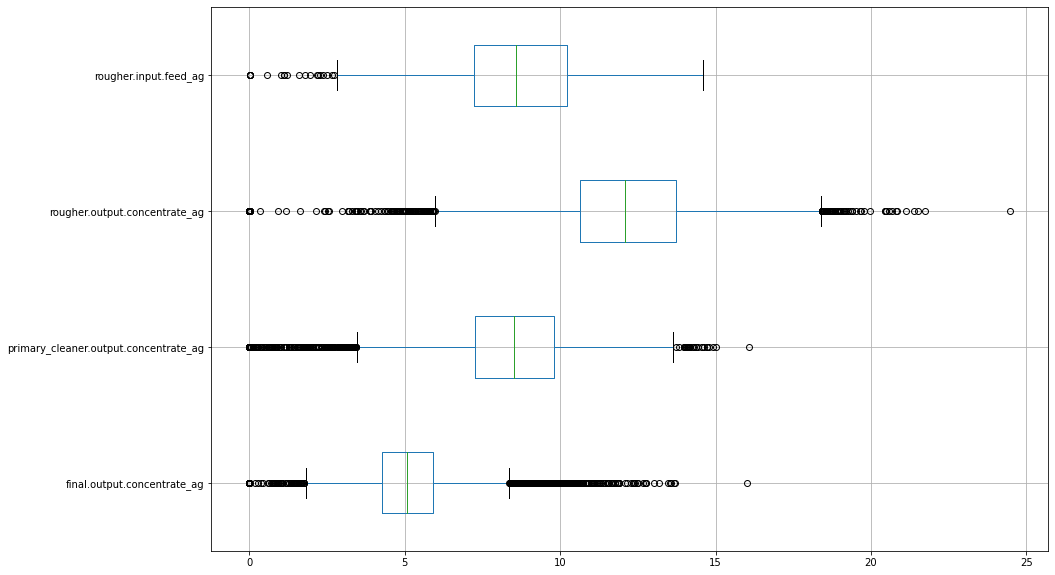

In [26]:
df.boxplot(
        column=[f'final.output.concentrate_ag', f'primary_cleaner.output.concentrate_ag', f'rougher.output.concentrate_ag', f'rougher.input.feed_ag'],
        figsize=(15, 10),
        vert=False
    )

<AxesSubplot:>

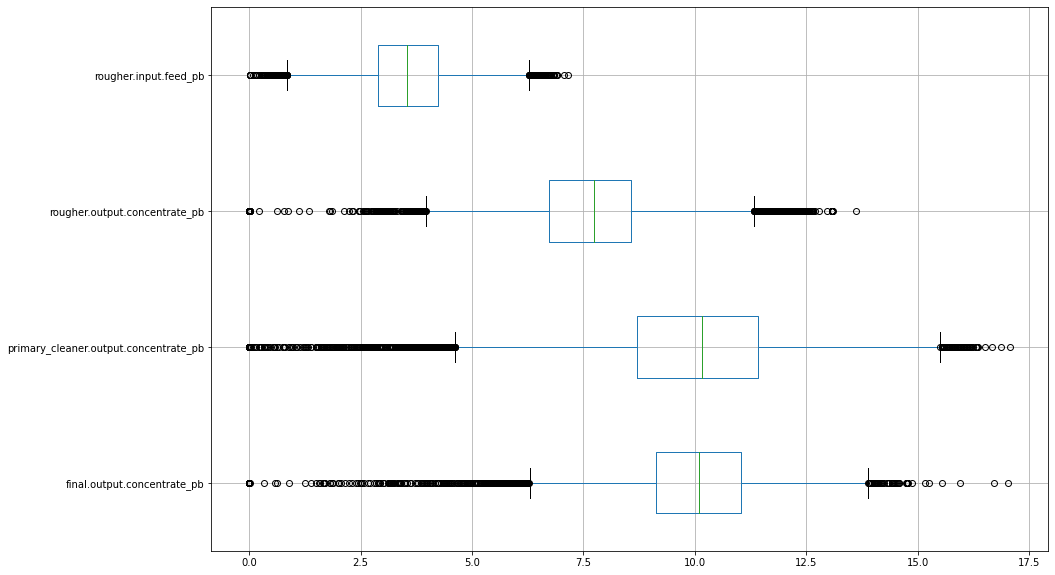

In [27]:
df.boxplot(
        column=[f'final.output.concentrate_pb', f'primary_cleaner.output.concentrate_pb', f'rougher.output.concentrate_pb', f'rougher.input.feed_pb'],
        figsize=(15, 10),
        vert=False
    )

<div class="alert alert-info">
 <font color='Blue'>
     <b>Вывод: концентрация золота с каждым этапом растет(иначе, не было бы смысла в обработке металлов). Концентрация серебра увеличивается после этапа флотации, а затем - уменьшается(избавление от примесей). Концентрация свинца в целом растет

<div class="alert alert-info">
 <font color='Blue'>
     <b>
Сравним распределение размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

<AxesSubplot:>

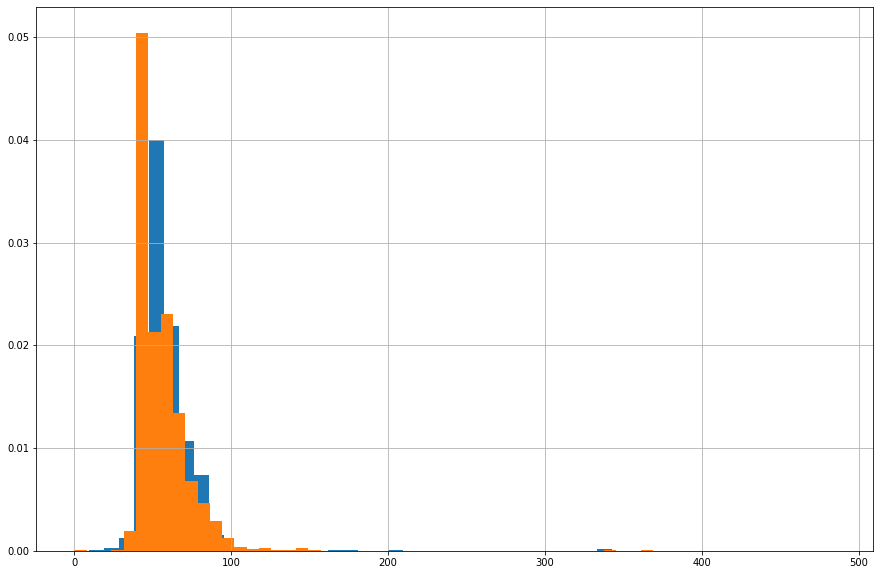

In [28]:
df_train['rougher.input.feed_size'].hist(bins=50,figsize=(15, 10),density=True)
df_test['rougher.input.feed_size'].hist(bins=50,figsize=(15, 10),density=True)



<div class="alert alert-info">
 <font color='Blue'>
     <b>В целом, распределения схожи

<div class="alert alert-info">
 <font color='Blue'>
     <b>Добавлено density=True

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [29]:
df['rougher.input.feed_sum']=df['rougher.input.feed_au'] + df['rougher.input.feed_ag'] + df['rougher.input.feed_sol'] + df['rougher.input.feed_pb']
df['rougher.output.concentrate_sum']=df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_sol'] + df['rougher.output.concentrate_pb']
df['final.output.concentrate_sum'] = df['final.output.concentrate_au'] + df['final.output.concentrate_ag'] + df['final.output.concentrate_sol'] + df['final.output.concentrate_pb']



<AxesSubplot:>

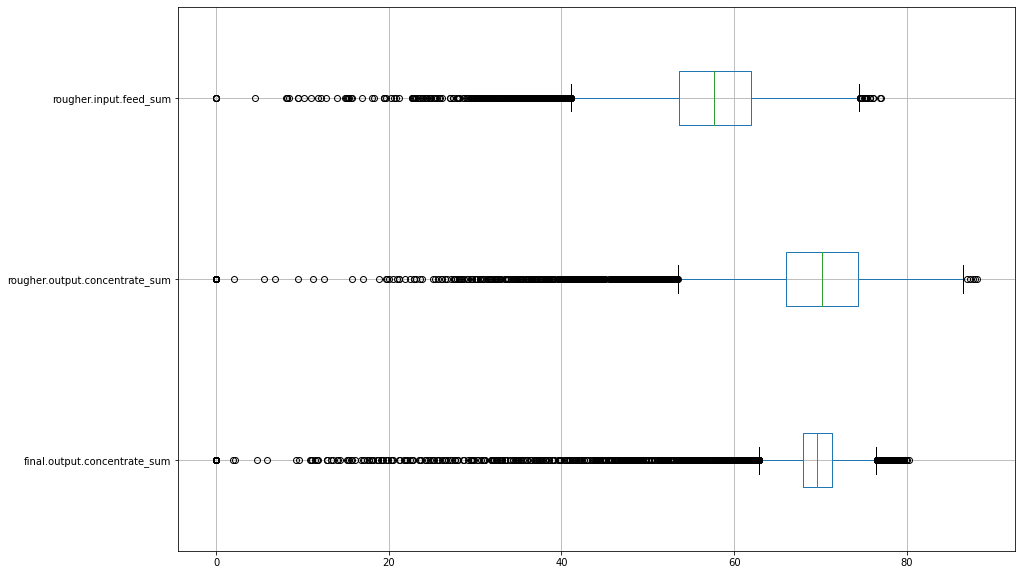

In [30]:
df.boxplot(
    column=[
        f'final.output.concentrate_sum',
        f'rougher.output.concentrate_sum',
        f'rougher.input.feed_sum'
    ],
    figsize=(15, 10),
    vert=False
)


<AxesSubplot:>

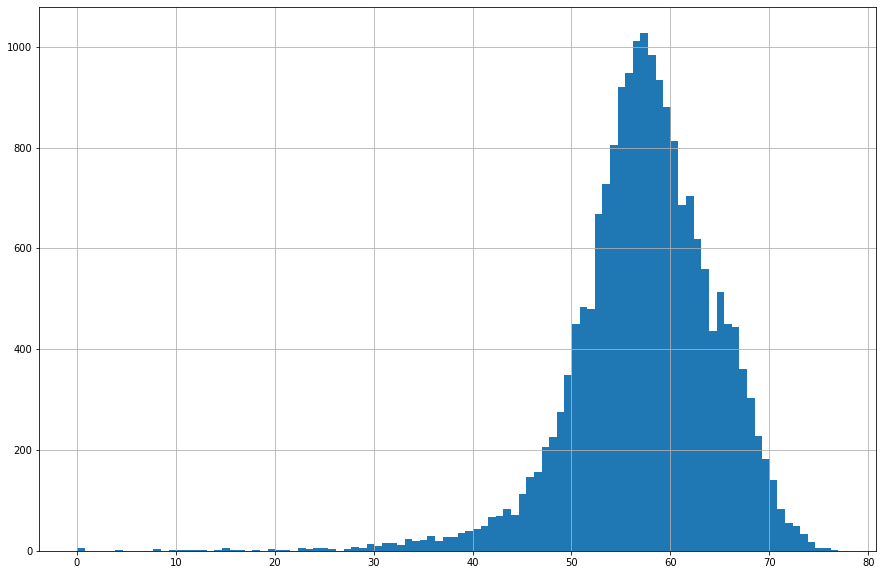

In [31]:
df['rougher.input.feed_sum'].hist(figsize=(15, 10),bins=100)


<AxesSubplot:>

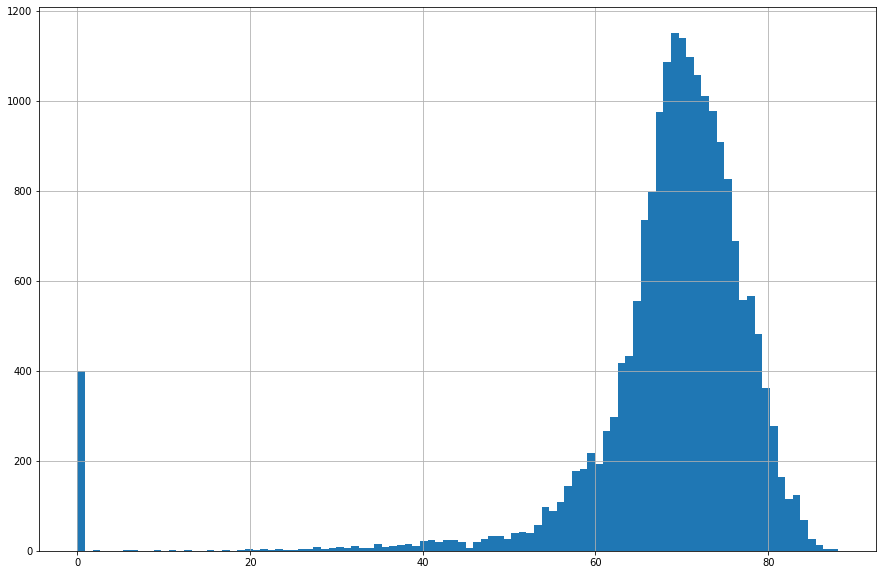

In [32]:
df['rougher.output.concentrate_sum'].hist(bins=100,figsize=(15, 10))


<div class="alert alert-info">
 <font color='Blue'>
     <b>Вывод: есть выбросы около нуля в rougher.output.concentrate_sum. Данных признаков все равно нет в тестовой выборке и их можно не обрабатывать.

## Модель

Напишем функцию для вычисления sMape и итоговой sMAPE.

In [33]:

def smape(y_true,y_pred):
    smape = 0
    n=len(y_true)
    for i in range(len(y_pred)):
        smape += abs(y_true[i] - y_pred[i]) / ((abs(y_true[i]) + abs(y_pred[i])) / 2)
    
    return smape / n * 100
    

In [34]:
#пока не пригодилась, легче перемножить на месте
#def final_smape(y_pred_rougher, y_true_rougher, y_pred_final, y_true_final):
        #return 0.25 * symmetric_mean_absolute_percentage_error(y_pred=y_pred_rougher, y_true=y_true_rougher) + 0.75 * symmetric_mean_absolute_percentage_error(y_pred=y_pred_final, y_true=y_true_final)


<div class="alert alert-info">
 <font color='Blue'>
     <b>Делим final и rougher на features, target и train,test соответственно

In [35]:

X_train_rougher = df_train
X_test_rougher = df_test
y_train_rougher = df.loc[X_train_rougher.index, 'rougher.output.recovery']
y_test_rougher = df.loc[X_test_rougher.index,'final.output.recovery']

X_train_final = df_train
X_test_final = df_test
y_train_final = df.loc[X_train_final.index, 'final.output.recovery']
y_test_final = df.loc[X_test_final.index, 'final.output.recovery']

In [36]:
y_train_final = y_train_final.fillna(y_train_final.mean())
y_train_rougher = y_train_rougher.fillna(y_train_rougher.mean())

In [37]:
from sklearn.model_selection import KFold

In [38]:
cv = KFold(n_splits=5, shuffle=False)


Подсмотрел применение кросс валидации на stackoverlow: https://stackoverflow.com/questions/49522928/cross-validation-in-linear-regression
Оттуда же модель Лассо, которая не изучалась в рамках обучения в Практикуме. На данный момент этот код не до конца мне понятен(использование PipeLine, GridSearch), буду разбираться.

<div class="alert alert-info">
 <font color='Blue'>
     <b>Принято, изучу catboost

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

In [38]:
from numpy.random import RandomState
state = RandomState(12345)

pipe = Pipeline([
    ('imp', SimpleImputer(missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=state))
])

params = [
    {
        'imp__strategy': ['mean', 'median'],
        'model': [RandomForestRegressor(n_estimators=10, random_state=state)],
        'model__max_features': np.linspace(0.1, 1, 10)
    }, {
        'imp__strategy': ['mean', 'median'],
        'model': [LinearRegression()]
    }, {
        'imp__strategy': ['mean', 'median'],
        'model': [linear_model.Lasso(random_state=state)],
        'model__alpha': np.logspace(-3, 1, 10)
    }
]

In [39]:
from sklearn.metrics import make_scorer, mean_squared_error
smape_score = make_scorer(smape, greater_is_better=False)

<div class="alert alert-info">
 <font color='Blue'>
     <b>Кросс-Валидация по K блокам:

In [40]:
cv = KFold(n_splits=5, shuffle=False)
grid_rougher = GridSearchCV(pipe, param_grid=params, cv=cv, n_jobs=-1, scoring=smape_score)

In [ ]:
grid_rougher.fit(X_train_rougher, y_train_rougher)


<div class="alert alert-info">
 <font color='Blue'>
     <b>Лучшие параметры для rougher

In [ ]:
print('Лучшие параметры:', grid_rougher.best_params_)
print('smape:', -grid_rougher.best_score_)

In [ ]:
grid_final = GridSearchCV(pipe, param_grid=params, cv=cv, n_jobs=-1,scoring=smape_score)

In [ ]:
grid_final.fit(X_train_final, y_train_final)


<div class="alert alert-info">
 <font color='Blue'>
     <b>Выведем лучшие подобранные параметры для финального этапа очистки

In [ ]:
print('Лучшие параметры', grid_final.best_params_)
print('Smape:', -grid_final.best_score_)

<div class="alert alert-info">
 <font color='Blue'>
     <b>Rougher тест:

In [ ]:
pipe_rougher = grid_rougher.best_estimator_

pipe_rougher.fit(X_train_rougher, y_train_rougher)
y_pred = pipe_rougher.predict(X_test_rougher)

smape_rougher = smape(df.loc[X_test_rougher.index, 'rougher.output.recovery'], y_pred)
smape_rougher

<div class="alert alert-info">
 <font color='Blue'>
     <b>Rougher финал

In [ ]:
pipe_final = grid_final.best_estimator_
    
pipe_final.fit(X_train_final, y_train_final)
y_pred_final = pipe_final.predict(X_test_final)

smape_final = smape(df.loc[X_test_rougher.index, 'final.output.recovery'],y_pred_final)
smape_final

<div class="alert alert-info">
 <font color='Blue'>
     <b>финальная smape по данной формуле

In [ ]:
final_smape = 0.25*smape_rougher + 0.75*smape_final
final_smape

<div class="alert alert-info">
 <font color='Blue'>
     <b>DummyRegressor добавил, причем он показал лучший результат на 0.7

In [56]:
dummy_regr = DummyRegressor(strategy='median')

In [57]:
dummy_regr.fit(X_train_rougher, y_train_rougher)


DummyRegressor(strategy='median')

In [58]:
y_pred = dummy_regr.predict(X_test_rougher)

smape_rougher = smape(df.loc[X_test_rougher.index, 'rougher.output.recovery'], y_pred)
smape_rougher

8.52041350659244

In [59]:
dummy_regr_final = DummyRegressor(strategy="median")
dummy_regr_final.fit(X_train_final, y_train_final)
y_pred_final = dummy_regr_final.predict(X_test_final)

smape_final = smape(df.loc[X_test_rougher.index, 'final.output.recovery'],y_pred_final)
smape_final

9.265806486673553

In [60]:
final_smape = 0.25*smape_rougher + 0.75*smape_final
final_smape

9.079458241653274

<div class="alert alert-info">
 <font color='Blue'>
     <b>Вывод: итоговый smape получился 8.3 на лучшей модели, которой является Лассо(причем, как для rougher, так и для final выборок).

<div class="alert alert-info">
 <font color='Blue'>
     <b>Добавлю: Константая модель выдает лучший результат Smape для данных выборок. Однако, этот отрыв не говорит о том, что модели обладают плохим качеством. Скорее, это говорит о том, что данные очень предсказуемы. 

<div class="alert alert-info">
 <font color='Blue'>
     <b>Вывод: Была проведена обработка данных, удалены ненужные признаки, исправлены аномалии(отрицательные значения, пропуски). В результате обучения и тестирования моделей машинного на обучения на выборках rough и final с целью предсказания эффективности восстановления в результате флотации и финального восстановления, пришли к выводу, что ввиду легкой предсказуемости данных лучше всего использовать простые модели, как dummyregressor. Показатели Smape для модели Лассо были рассчитаны с помощью k(5)-блочной валидации.